In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

#### The dataset chosen can be found in:
_https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice_

In [2]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database specified by the db_file
    
    :param db_file: database file
    :return: the Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
# LOAD THE DATABASE INTO THE VARIABLE
cmcd = sqlite3.connect("Documents/GitHub/DataScienceFoundations/Session_5-Homework/Contraceptive Method Choice-Data.db")

# Load the data into a DataFrame
df = pd.read_sql_query("SELECT * from couple", cmcd)

cmcd.close()

#### Start by getting a better understanding of the dataset by some basic formulas in order to retrieve basic information.

In [4]:
df.shape

(1473, 10)

<font color=blue>We have 1472 different married woman samples with 10 different variables.</font>

In [5]:
df.isnull().sum()

Wifesage                    0
Wifeseducation              0
Husbandseducation           0
Numberofchildreneverborn    0
Wifesreligion               0
Wifesnowworking?            0
Husbandsoccupation          0
Standard-of-livingindex     0
Mediaexposure               0
Contraceptivemethodused     0
dtype: int64

<font color=blue>We have no missing data.</font>

In [6]:
df.head(1473)

,Wifesage,Wifeseducation,Husbandseducation,Numberofchildreneverborn,Wifesreligion,Wifesnowworking?,Husbandsoccupation,Standard-of-livingindex,Mediaexposure,Contraceptivemethodused
0,29,3,3,4,1,1,3,4,0,2
1,27,2,2,5,1,1,3,1,0,2
2,40,3,4,5,1,1,1,2,0,2
3,30,2,2,6,1,1,3,1,0,2
4,24,4,4,1,1,0,1,4,0,2
5,36,4,4,2,1,0,1,4,0,2
6,17,2,2,1,1,1,3,2,0,2
7,28,1,2,4,1,1,2,3,0,2
8,27,2,4,1,1,1,1,4,0,2
9,21,3,3,1,1,1,3,3,0,2


In [7]:
f = open('Documents/GitHub/DataScienceFoundations/Session_5-Homework/Contraceptive Method Choice-Names.txt', 'r')
file_contents = f.read()
print (file_contents)

1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term m

<font color=blue>Printing the specifications of this file will not only tell us what we already knew (sample, variables and missing files) but also we can have all the information needed to comprehend the data. Specially important to know what the attributes of each variable represent in table seen in df.head().</font>

### 1) What type of contraceptives does this dataset use?

In [172]:
Nouse = sum(df['Contraceptivemethodused'] == 1)
Shortterm = sum(df['Contraceptivemethodused'] == 2)
Longterm = sum(df['Contraceptivemethodused'] == 3)

print(Nouse,"women don't use contraceptives. This represents the",round(Nouse/1472*100),"% of the dataset")
print(Shortterm, "women use shot-term contraceptives. This represents the",round(Shortterm/1472*100),"% of the dataset")
print(Longterm, "women use long-term contraceptives. This represents the",round(Longterm/1472*100),"% of the dataset")

629 women don't use contraceptives. This represents the 43.0 % of the dataset
511 women use shot-term contraceptives. This represents the 35.0 % of the dataset
333 women use long-term contraceptives. This represents the 23.0 % of the dataset


<font color=green>There is tendency to have a lack of use of contraceptives. The use of none to long term decreases, as seen in the following plot:</font>

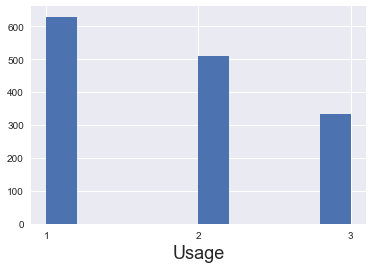

In [9]:
df['Contraceptivemethodused'].hist()
plt.xticks([1,2,3])
plt.xlabel('Usage', fontsize=18)

### 2) In order to comprehend a little bit better how education and media exposure really mean, it is important to know the age of the women we are analyzing

In [10]:
df["Wifesage"].mean()

32.53835709436524

In [11]:
df["Wifesage"].median()

32.0

<font color=green>First, we need to know not only the mean but the median to really take into consideration age. In this case, as age is almost the same for both, we can say that this women:
>- have already been through the education funnel and therefore won't be moving forward in the scale.

>- have had enough media exposure (although this will obvously change contemplating their living standards) for them to by influenced by ads. Although we are talking of a time where social media didn't existed yet, there were a lot of stimuli from tv, radio, billboards/display advertising, newspapers & magazine.

### 3) How is education distributed in terms of gender?

In [12]:
df.Husbandseducation.value_counts()

4    899
3    352
2    178
1     44
Name: Husbandseducation, dtype: int64

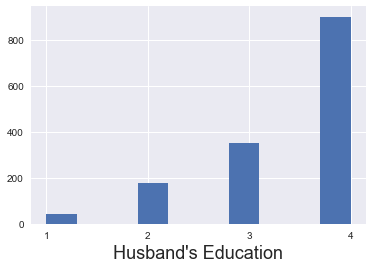

In [13]:
df['Husbandseducation'].hist()
plt.xticks([1,2,3, 4])
plt.xlabel("Husband's Education", fontsize=18)

In [14]:
df.Wifeseducation.value_counts()

4    577
3    410
2    334
1    152
Name: Wifeseducation, dtype: int64

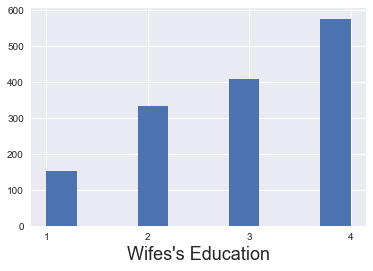

In [15]:
df['Wifeseducation'].hist()
plt.xticks([1,2,3,4])
plt.xlabel("Wifes's Education", fontsize=18)

<font color=green>We seem to be handling a very educated database. There is a difference bewtween gender, as men are allocated in a higher education than woman.  </font>

### 4) Is there any difference between education in couples?

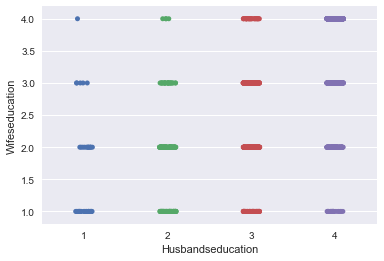

In [16]:
sns.stripplot(x="Husbandseducation", y="Wifeseducation", data=df, jitter=True)

<font color=green>As we can see from the plot above, most couples are drawn together as education as a variable. Nevertheless, there are less couples with the wife being highly educated and the husband with low education whearas this doesn't happen the other way round. </font>

### 5) Let's make an index in order to use both variables as just one

In [17]:
df['Coupleeducation'] = (df['Husbandseducation'] + df['Wifeseducation'])/2

In [18]:
df.head()

,Wifesage,Wifeseducation,Husbandseducation,Numberofchildreneverborn,Wifesreligion,Wifesnowworking?,Husbandsoccupation,Standard-of-livingindex,Mediaexposure,Contraceptivemethodused,Coupleeducation
0,29,3,3,4,1,1,3,4,0,2,3.0
1,27,2,2,5,1,1,3,1,0,2,2.0
2,40,3,4,5,1,1,1,2,0,2,3.5
3,30,2,2,6,1,1,3,1,0,2,2.0
4,24,4,4,1,1,0,1,4,0,2,4.0


<font color=green>Now we have a new value that contemplates the couples education.</font>

In [19]:
df.Coupleeducation.value_counts()

4.0    544
3.0    259
3.5    257
2.5    178
2.0    136
1.5     73
1.0     26
Name: Coupleeducation, dtype: int64

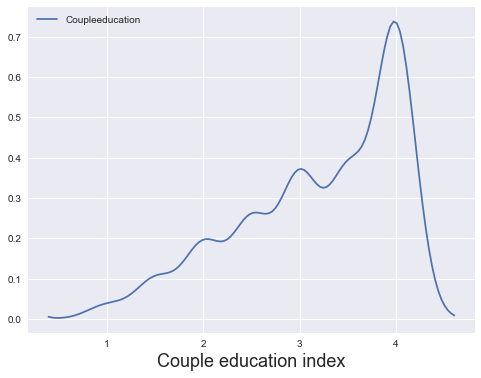

In [20]:
plt.figure(figsize=[8,6])
sns.kdeplot(df['Coupleeducation'])
plt.xticks([1,2,3,4])
plt.xlabel('Couple education index', fontsize=18)

<font color=green>We can see that education as a positive curve.</font>

### 6) Now that we have this index, let's see if education is a factor in the contraceptives usage

In [21]:
df[['Contraceptivemethodused','Coupleeducation']].groupby('Coupleeducation').mean()

,Contraceptivemethodused
Coupleeducation,
1.0,1.307692
1.5,1.438356
2.0,1.566176
2.5,1.516854
3.0,1.745174
3.5,1.782101
4.0,2.055147


<font color=green>As we can clearly see from the table above, and as anyone would have assume previously, the more educated couples are, the more they consider long-term contraceptive methods.</font>

### 7) Does the contraceptive method used change by age?

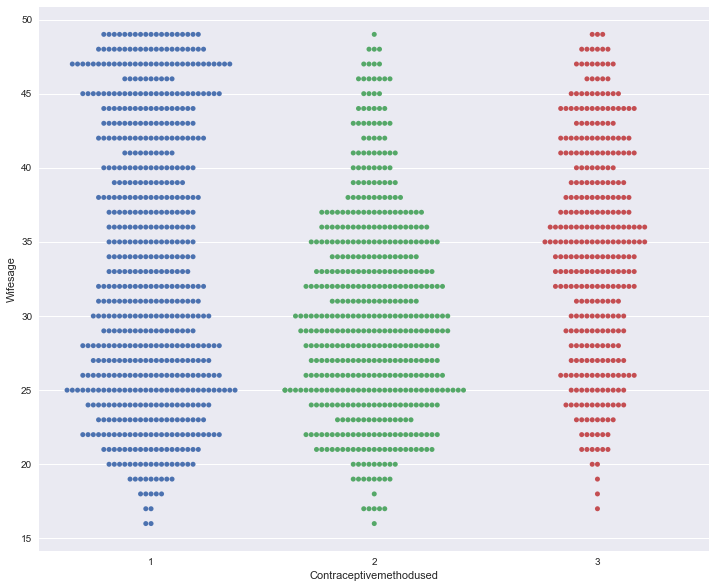

In [22]:
plt.figure(figsize=[12,10])
sns.swarmplot(x="Contraceptivemethodused", y="Wifesage", data=df)
plt.show()

<font color=green>From the swarm plot we have above we can conclude with:
>- Teenagers until 20 mostly use short-term contraceptive or none at all (probably given by their first encounters with sex and the fact that they are far from having a stable couple).

>- Most woman over 37 stop using contraceptives. This probably is because they have already got a stable relationship and aren't biologically capable of become pregnant so there is no use in them.

>- Heavy users of short-term contraceptives are found between ages 25 and 35.

### 8) Is there any relationship between religion and children born?

In [23]:
df[['Wifesreligion','Numberofchildreneverborn']].groupby('Wifesreligion').mean()

,Numberofchildreneverborn
Wifesreligion,
0,2.845455
1,3.334397


<font color=green>There is bit of a difference between religions in terms of amout of children born as islamic women have more children than non islamic ones. All in all though, they have a high mean for children born.</font>

### 9) Is the contraceptive method something that changes for Islamic women?

In [68]:
df[['Wifesreligion','Contraceptivemethodused']].groupby('Wifesreligion').mean()

,Contraceptivemethodused
Wifesreligion,
0,2.004545
1,1.762969


<font color=green>There doesn't seem to be much difference between religions the use of contraceptives although non-islamic woman have a little bit less use of long-term contraceptives(probably by the fact of the lack of use of such?).</font>

### 10) Is Islamic mean lower than non-islamic because most of them do not use contraceptives?

In [81]:
df.ix[(df['Wifesreligion'] == 1)]
df['Contraceptivemethodused'].mode()

0    1
dtype: int64

<font color=green>Yes it is. As the mode is 1, most islamic do not use contraceptives and that is why the mean is lower than not islamic. This must be a consequence of extremism within the religion, as extremist islamic do not believe is contraceptives.</font>

### 11) Do women that don't work have more children that those who do?

In [90]:
df[['Wifesnowworking?','Numberofchildreneverborn']].groupby('Wifesnowworking?').mean()

,Numberofchildreneverborn
Wifesnowworking?,
0,2.864499
1,3.394022


<font color=green>Women that work have less children that does who don't. This may occur because they want to focus on a carrer or the fact that the ones who don't work don't need to because they husband has a very good job and they consider being a mom their main job (we have to consider that the dataset is from 1987) or the fact that because they have children they cannot afford working (timewise).</font>

### 12) Contemplating the above discovery, lets see if the assumption of correlation between husbands job and woman not working are correct.

In [140]:
df[['Wifesnowworking?','Husbandsoccupation']].groupby('Husbandsoccupation').sum()

,Wifesnowworking?
Husbandsoccupation,
1,325
2,310
3,453
4,16


<font color=green>The table refutes the assumption previously made as, the best the husband's ocupation goes, the more than their wifes work too.</font>

### 13) Continuing with the assumptions taken on point 11, let's see if we can asume that woman have less children when working using their education as a standard of self-actualization.

In [124]:
df[['Numberofchildreneverborn','Wifeseducation']].groupby('Wifeseducation').sum()

,Numberofchildreneverborn
Wifeseducation,
1,672
2,1172
3,1326
4,1634


<font color=green>Contrary to was suspected, the more educated women are, more children they tend to have.</font>

### 14) Are living standars a reason not to have children?

In [120]:
df[['Standard-of-livingindex','Numberofchildreneverborn']].groupby('Standard-of-livingindex').sum()

,Numberofchildreneverborn
Standard-of-livingindex,
1,419
2,756
3,1413
4,2216


<font color=green>Continuing with logic drawn in number 13, living standars put up a wall for children to be born. </font>

### 15) Are living standars something that would prevent media exposure?

In [123]:
df[['Standard-of-livingindex','Mediaexposure']].groupby('Standard-of-livingindex').sum()

,Mediaexposure
Standard-of-livingindex,
1,29
2,40
3,22
4,18


<font color=green>All in all, media exposure seems to be good. There are few cases were media exposure is not good and living standards doesn't seem to be a problem. This is good becaus media can reach places that education hasn't in order to communicate sexual education.

### 16) Is standar's of living a variable in the contraceptives use? probably drawn by access.

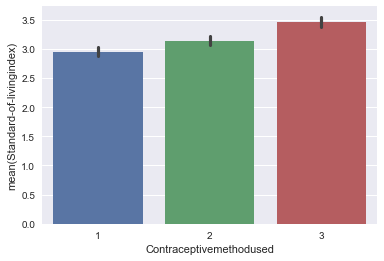

In [146]:
sns.barplot('Contraceptivemethodused', 'Standard-of-livingindex', data=df)

<font color=green> We can see a tendency in the method of contraception as living standars change these ones. Best living standars draw long-term contraceptives with them. Nevertheless, the difference doesn't seem to be much and therefore cannot consider it a variable for the usage.

### 17) Are new generations more islamic or are they abandoning their religion?

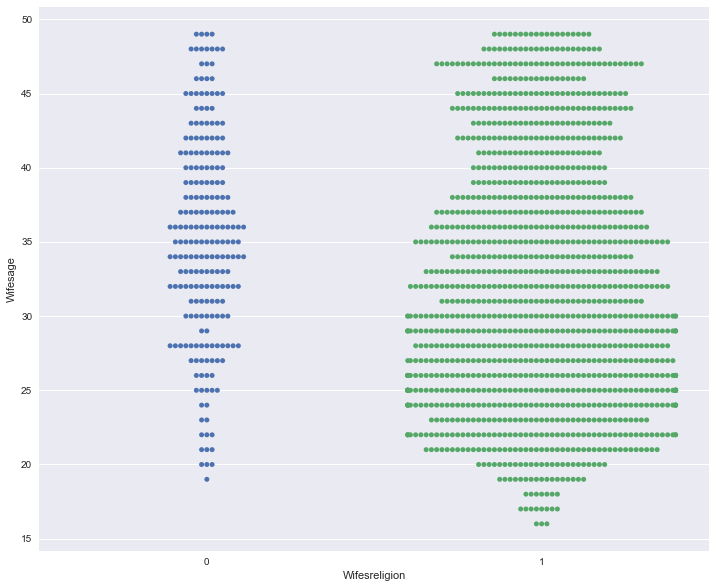

In [154]:
plt.figure(figsize=[12,10])
sns.swarmplot(x="Wifesreligion", y="Wifesage", data=df)
plt.show()

<font color=green>As seen in the factor plot above, there are still a lot of young islamic women. If we take the layer from 25 and below, there are more islamic women than previous generations.

### 18) Is there any difference in media exposure in terms of age?

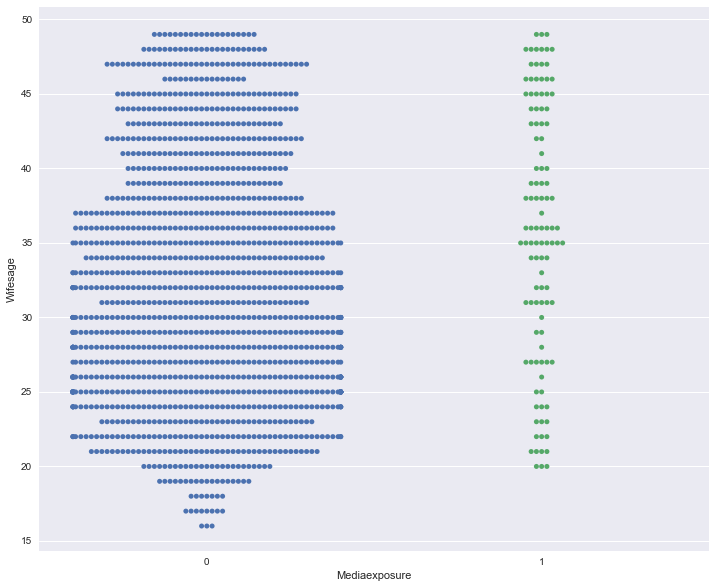

In [158]:
plt.figure(figsize=[12,10])
sns.swarmplot(x="Mediaexposure", y="Wifesage", data=df)
plt.show()

<font color=green> Most people have good media exposure no matter their age.

### 19) Is there any substencial difference between the husband's education and the catogory of their work?

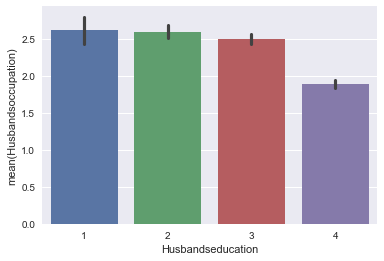

In [163]:
sns.barplot('Husbandseducation', 'Husbandsoccupation', data=df)

<font color=green>As seen in the plot, the more educated men are the worst categorical job they have. This is really strange and would make some further analysis to discover why this happens.

### 20) Is media exposure greater when the wife doesn't work?

In [170]:
df[['Wifesnowworking?','Mediaexposure']].groupby('Wifesnowworking?').sum()

,Mediaexposure
Wifesnowworking?,
0,27
1,82


<font color=green> Media exposure is not good for woman that don't work. Suggesting they don't have stimuli from media because of lack of access.

<font color=red>To conclude, the most intereting info can be found in the items: 
> - 7
> - 9|10
> - 12
> - 17